### 100,000 UK Used Car Data set
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes


1. Выбрать набор данных для своей группы: <br>
    3530203_70101: Audi <br>
    3530203_70102: BMW <br>
    3530903_70301: Ford <br>
    3530903_70302: Mercedes<br>
    
2. Разбить данные на тренировочные и тестовые (70% на 30%, random_state=10).
3. Попытаться обучить регрессии c лучшим качеством. 


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### Выбираем данные

In [3]:
auto_data = pd.read_csv("audi.csv")
auto_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [4]:
#смотрим информацию о столбцах
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


Из информации, полученной с помощью функции info() можно сделать вывод, что значений null в датасете нет

### Проверим столбцы, в которых наиболее вероятно могут быть выбросы:
1. Проверим атрибут engineSize (объем двигателя не может быть меньше, либо равен 0)

In [5]:
auto_data[auto_data.engineSize <= 0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
7505,Q5,2019,44790,Automatic,5886,Petrol,135,117.7,0.0
7506,Q3,2019,32788,Automatic,1500,Diesel,145,47.1,0.0
7516,Q3,2020,29944,Manual,1500,Petrol,145,40.9,0.0
7517,Q3,2020,33333,Automatic,1500,Diesel,145,47.1,0.0
7518,Q3,2020,29944,Automatic,1500,Petrol,145,32.5,0.0
7519,Q3,2020,37990,Automatic,1500,Petrol,145,30.7,0.0
7521,Q5,2020,49790,Automatic,1500,Petrol,135,117.7,0.0
7542,Q3,2019,31888,Manual,2001,Petrol,145,40.4,0.0
7545,Q2,2020,24988,Automatic,1500,Petrol,145,42.2,0.0
7546,A3,2017,17390,Manual,7110,Petrol,30,60.1,0.0


Убирам эти строки из датасета

In [6]:
auto_data = auto_data[auto_data.engineSize > 0]
auto_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


2. Проверим атрибуты mpg, tax, price, mileage. Эти параметры не должны быть меньше, либо равными 0. (таких значений в датасете нет)

In [7]:
auto_data[auto_data.mpg <= 0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [8]:
auto_data[auto_data.tax < 0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [24]:
auto_data[auto_data.price <= 0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [9]:
auto_data[auto_data.mileage <= 0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


3. Проверим год выпуска машины (таких значений в датасете нет)

In [10]:
# проверяем, что год выуска не превышает текущий
auto_data[auto_data.year > 2021]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [11]:
# проверяем, что год выуска не меньше года изобретения авто
auto_data[auto_data.year < 1886]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [14]:
# Преобразуем номинальные величины в значения от 0 до n-1
object_cols = auto_data.columns[auto_data.dtypes == 'object']
le = LabelEncoder()
for col in object_cols:
    auto_data2[col] = le.fit_transform(auto_data[col])
auto_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,1,15735,2,150,55.4,1.4
1,5,2016,16500,0,36203,0,20,64.2,2.0
2,0,2016,11000,1,29946,2,30,55.4,1.4
3,3,2017,16800,0,25952,0,145,67.3,2.0
4,2,2019,17300,1,1998,2,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,2,2020,16999,1,4018,2,145,49.6,1.0
10664,2,2020,16999,1,1978,2,150,49.6,1.0
10665,2,2020,17199,1,609,2,150,49.6,1.0
10666,9,2017,19499,0,8646,2,150,47.9,1.4


In [15]:
# Проверяем, что все необходимые столбцы были преобразованы
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10611 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10611 non-null  int32  
 1   year          10611 non-null  int64  
 2   price         10611 non-null  int64  
 3   transmission  10611 non-null  int32  
 4   mileage       10611 non-null  int64  
 5   fuelType      10611 non-null  int32  
 6   tax           10611 non-null  int64  
 7   mpg           10611 non-null  float64
 8   engineSize    10611 non-null  float64
dtypes: float64(2), int32(3), int64(4)
memory usage: 704.6 KB


### Разбить данные на тренировочные и тестовые

In [17]:
# Разделяем данные на признаки и ответы
X, Y = auto_data.drop(['price'], axis=1), auto_data['price']

In [18]:
# Разделяем данные на тренировочные и тестовые
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [19]:
# Стандартизируем данные
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)
X_train_scaled

array([[ 0.61715863, -1.44261038, -0.11388386, ...,  1.61215467,
        -0.93657389,  0.10878549],
       [-0.15726792,  0.42057844, -1.42522557, ...,  0.28161276,
         0.27706261,  0.10878549],
       [ 1.00437191, -1.90840758, -1.42522557, ...,  2.57310161,
        -0.97547249,  1.81945625],
       ...,
       [-0.73808783,  0.88637564, -0.11388386, ...,  0.28161276,
         0.36263955,  0.10878549],
       [ 3.71486484, -0.04521877,  1.19745785, ...,  0.35553176,
        -0.61760532,  0.10878549],
       [-0.5444812 , -0.51101597,  1.19745785, ..., -1.56636212,
         1.28842636,  0.10878549]])

### Попытаться обучить регрессии c лучшим качеством

#### Линейная регрессия 

In [20]:
simple_LR = LinearRegression()
simple_LR.fit(X_train_scaled, Y_train)
# Строим прогноз
simple_LR_predictions = simple_LR.predict(X_test_scaled)
simple_LR_predictions

array([22503.80571342, 43322.91109115, 28503.93221111, ...,
       28914.81634412, 28210.07524038, 36085.73415901])

Text(0, 0.5, 'Target')

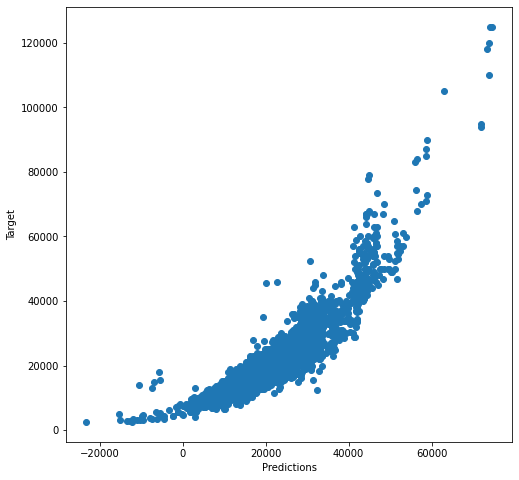

In [21]:
plt.figure(figsize=(8, 8))
plt.scatter(simple_LR_predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [25]:
# Считаем среднеквадратичную ошибку
simple_LR_RMSE = metrics.mean_squared_error(Y_test, simple_LR_predictions, squared = False)

print (f'RMSE = {round(simple_LR_RMSE,3)}')

RMSE = 5179.087


#### Lasso

In [26]:
model = Lasso()
model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)
#predictions

In [27]:
print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

RMSE = 5179.101


#### Ridge (гребневая регрессия)

In [29]:
model = Ridge()
model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)
print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

RMSE = 5179.116


#### Случайный лес

In [31]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 10, n_estimators = 100)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

RMSE = 2345.155


Text(0, 0.5, 'Target')

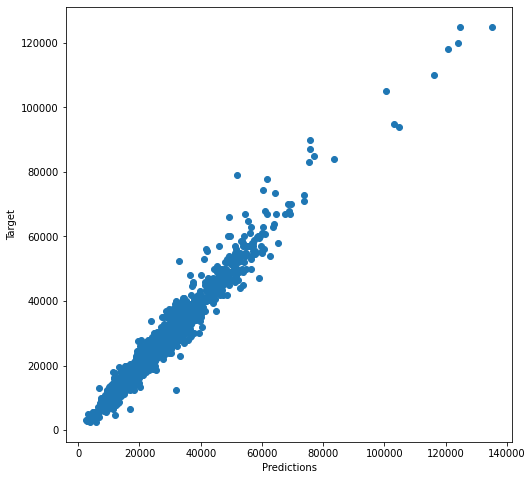

In [32]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')